# Ejercicio 1

# ¿Cómo funciona el método de von Neumann?

El método genera números pseudoaleatorios a partir de una semilla inicial. Se basa en estos pasos:

1. **Elevar al cuadrado** el número actual.
2. **Extraer los dígitos centrales** del resultado.
3. **Repetir el proceso** con el nuevo número generado.



In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [29]:
def von_neumann(seed, n):
    """Genera una serie de números pseudoaleatorios con el método de von Neumann"""
    random_numbers = []
    num = int(seed * 10**4)  # Convertimos la semilla a un número entero de 4 dígitos

    for _ in range(n):
        num = (num ** 2)  # Elevar al cuadrado
        num_str = f"{num:08d}"  # Asegurar que tiene al menos 8 dígitos
        num = int(num_str[len(num_str)//2 - 2:len(num_str)//2 + 2])  # Extraer los 4 dígitos centrales
        random_numbers.append(num / 10**4)  # Normalizar entre 0 y 1

    print(random_numbers)
    return random_numbers

[0.1569, 0.4617, 0.3166, 0.0235, 0.0552, 0.3047, 0.2842, 0.0769, 0.5913, 0.9635, 0.8332, 0.4222, 0.8252, 0.0955, 0.912, 0.1744, 0.0415, 0.1722, 0.9652, 0.1611, 0.5953, 0.4382, 0.2019, 0.0763, 0.5821, 0.884, 0.1456, 0.1199, 0.4376, 0.1493, 0.229, 0.2441, 0.9584, 0.853, 0.7609, 0.8968, 0.425, 0.0625, 0.3906, 0.2568, 0.5946, 0.3549, 0.5954, 0.4501, 0.259, 0.7081, 0.1405, 0.974, 0.8676, 0.2729, 0.4474, 0.0166, 0.0275, 0.0756, 0.5715, 0.6612, 0.7185, 0.6242, 0.9625, 0.6406, 0.0368, 0.1354, 0.8333, 0.4388, 0.2545, 0.477, 0.7529, 0.6858, 0.0321, 0.103, 0.0609, 0.3708, 0.7492, 0.13, 0.69, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61]


In [31]:
# Generar 140 números
seed = 0.3187
random_numbers = von_neumann(seed, 140)

In [33]:
# Definir tamaños de muestra para el test KS
sample_sizes = [40, 60, 80, 100, 120, 140]
p_values = []

In [35]:
# Aplicar el test KS para diferentes tamaños de muestra
for size in sample_sizes:
    sample = random_numbers[:size]
    #create two var and add to the list of values(p_values)
    ks_stat, p_value = stats.kstest(sample, 'uniform')  # Comparar con una distribución uniforme
    p_values.append(p_value)# if the result is lest to 0.05000 se rechasa por el tes the komodoro de Smirnof (ks)
    print(f"KS Test para {size} datos: p-value = {p_value:.5f}")

KS Test para 40 datos: p-value = 0.04472
KS Test para 60 datos: p-value = 0.18330
KS Test para 80 datos: p-value = 0.13036
KS Test para 100 datos: p-value = 0.16570
KS Test para 120 datos: p-value = 0.12113
KS Test para 140 datos: p-value = 0.05715


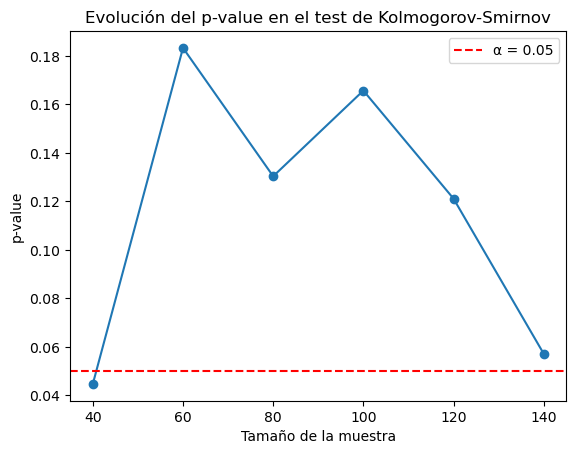

In [37]:
# Graficar evolución del p-value
plt.plot(sample_sizes, p_values, marker='o', linestyle='-')
plt.axhline(y=0.05, color='r', linestyle='--', label="α = 0.05")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("p-value")
plt.title("Evolución del p-value en el test de Kolmogorov-Smirnov")
plt.legend()
plt.show()

# Análisis de la evolución de la significación en el test de Kolmogorov-Smirnov (KS)

El test de **Kolmogorov-Smirnov (KS)** evalúa si un conjunto de datos sigue una distribución específica, en este caso, una **distribución uniforme en el intervalo** \([0,1]\).  

Se interpreta el **p-value** de la siguiente manera:

- **Si p-value < 0.05**, se **rechaza la hipótesis nula** (los datos **NO** siguen la distribución uniforme).  
- **Si p-value ≥ 0.05**, **no se rechaza la hipótesis nula** (los datos **podrían** provenir de una distribución uniforme).  
